In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

#Read files
c_d = pd.read_csv(city_data_to_load)
r_d = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combine_data = pd.merge(r_d, c_d, how="left", on="city")

#Display preview
combine_data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


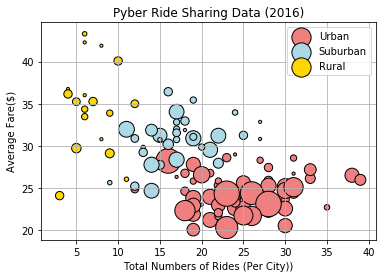

In [13]:
#Get x and y coordinates
urban = combine_data.loc[(combine_data["type"] == "Urban")]
suburban = combine_data.loc[(combine_data["type"] == "Suburban")]
rural = combine_data.loc[(combine_data["type"] == "Rural")]

x_urban = urban.groupby(["city"])["ride_id"].nunique()
y_urban = urban.groupby(["city"])["fare"].mean()
x_suburban = suburban.groupby(["city"])["ride_id"].nunique()
y_suburban = suburban.groupby(["city"])["fare"].mean()
x_rural = rural.groupby(["city"])["ride_id"].nunique()
y_rural = rural.groupby(["city"])["fare"].mean()
bubble_size = combine_data.groupby(["type", "city"]).driver_count.mean()
#Create formats of scatter points 
plt.grid()
plt.scatter(x_urban, y_urban, color="lightcoral", s=bubble_size*10, edgecolors="black", label="Urban")
plt.scatter(x_suburban, y_suburban, color="lightblue", s=bubble_size*10, edgecolors="black", label="Suburban")
plt.scatter(x_rural, y_rural, color="gold", s=bubble_size*10, edgecolors="black", label="Rural")

#Format Chart with titles, labels, and legend
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Numbers of Rides (Per City))")
plt.ylabel("Average Fare($)")
plt.legend(loc='upper right')

       
#Save figure
plt.savefig("pyber.png")

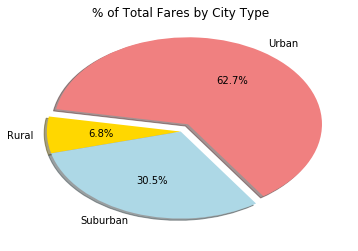

In [14]:
#Total Fares by City Type
# Calculate Type Percents
total_fares_type = combine_data.groupby(["type"]).fare.sum()
#Create variables to easier format
labels = ["Rural","Suburban","Urban"]
colors = ["gold", "lightblue", "lightcoral"]
explode = [0,0,.1]
#Title Chart
plt.title("% of Total Fares by City Type")
# Build Pie Chart
plt.pie(total_fares_type, labels=labels, colors=colors, explode=explode, startangle=170, shadow=True, autopct="%.1f%%")

# Save Figure
plt.savefig("pyber2.png")

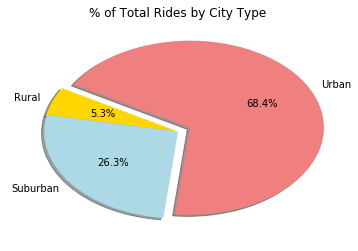

In [15]:
#Total Rides by City Type  
# Calculate Ride Percents
total_rides_type = combine_data.groupby(["type"]).ride_id.count()
#Create variables to easier format
labels = ["Rural","Suburban","Urban"]
colors = ["gold", "lightblue", "lightcoral"]
explode = [0,0,.1]
#Title Chart
plt.title("% of Total Rides by City Type")
# Build Pie Chart
plt.pie(total_rides_type, labels=labels, colors=colors, explode=explode, startangle=150, shadow=True, autopct="%.1f%%")
#Save Figure
plt.savefig("pyber3.png")

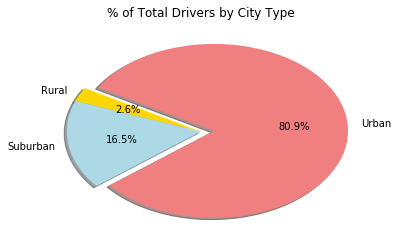

In [16]:
#Total Drivers by City Type
#Calculate Driver Percents- Use original uncombined city data 
total_drivers_type = c_d.groupby(["type"]).driver_count.sum()
#Create variables to easier format
labels = ["Rural","Suburban","Urban"]
colors = ["gold", "lightblue", "lightcoral"]
explode = [0,0,.1]
#Title Chart
plt.title("% of Total Drivers by City Type")
# Build Pie Chart
plt.pie(total_drivers_type, labels=labels, colors=colors, explode=explode, startangle=150, shadow=True, autopct="%.1f%%")
#Save Figure
plt.savefig("pyber4.png")

In [ ]:
#Analytical Trends 
#1. Due to the volume Urban areas produced the most variables within the data.
#2. Suburan area can be considered more profitable than any other area because fares were utilized at greater costs.
#3. Rural areas were considered outliers within the data as drivers, fares, and rides were less than 10% of the overall data.